<a href="https://colab.research.google.com/github/Source-Code777/Machine_Learning_Projects/blob/main/Counselling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GATHERING DATA USING PANDAS WEB_SCRAPPER FROM WBJEE_WEBSITE**

In [1]:
import pandas as pd
url_23='https://admissions.nic.in/wbjeeb/Applicant/report/orcrreport.aspx?enc=b6w3EPyuw0C4FADZ4v1XmYUz0XFq314fzLjkE3wbM2xr/DbsjpvUS9LBCKXjSeSL'
tables_23=pd.read_html(url_23)
url_24='https://admissions.nic.in/wbjeeb/Applicant/report/orcrreport.aspx?enc=Nm7QwHILXclJQSv2YVS+7l8OpFY/O746kfneOXEneV50mv1B/txHsSKB11hFlsvw'
tables_24=pd.read_html(url_24)

**CREATING DATAFRAMES YEAR-WISE**

In [2]:
df_23=tables_23[0]
df_24=tables_24[0]

In [3]:
df_23.sample(5)

,Sr.No,Round,Institute,Program,Stream,Seat Type,Quota,Category,Opening Rank,Closing Rank
2105,2106,Round 2,Durgapur Institute of Advanced Technology & Ma...,Computer Science & Engineering,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,All India,Open,73750,88029
3251,3252,Round 3,"Asansol Engineering College, Asansol, Burdwan",Computer Science & Engineering (Internet Of Th...,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,JEE(Main) Seats,All India,Open,137499,556018
3687,3688,Round 3,"Jis College of Engineering, Kalyani, Nadia",Electronics & Communication Engineering (TFW),B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,Home State,Tuition Fee Waiver,35521,38127
1947,1948,Round 2,"Abacus Institute of Engineering & Management, ...",Electrical Engineering,B.E/B.Tech (JEE(Main) Seats),JEE(Main) Seats,All India,Open,445831,445831
852,853,Round 1,Guru Nanak Institute of Pharmaceutical Science...,B.Pharm/Pharmaceutical Technology,B. Pharma,WBJEE Seats,All India,Open,330,8448


**RE-NAMING THE FEATURES **

In [4]:
def clean_table(df, year):

    df.columns = df.columns.str.strip()
    rename_map = {
        "Institute": "College Name",
        "Institute Name": "College Name",
        "Program": "Program",
        "Branch": "Program",
        "Quota": "Quota",
        "Seat Pool": "Quota",
        "Category": "Category",
        "Opening Rank": "Opening Rank",
        "Closing Rank": "Closing Rank",
        "Round": "Round"
    }
    df = df.rename(columns={col: rename_map.get(col, col) for col in df.columns})
    df["Year"] = year
    return df

 **ADDING YEAR COLUMN IN THE DATAFRAME**

In [5]:
df_23 = clean_table(df_23, 2023)
df_24 = clean_table(df_24, 2024)

**CONACATENATING THE DATA-FRAMES**

In [6]:
df = pd.concat([df_23, df_24], ignore_index=True)

df["Opening Rank"] = pd.to_numeric(df["Opening Rank"], errors="coerce")
df["Closing Rank"] = pd.to_numeric(df["Closing Rank"], errors="coerce")

print(df.shape)
print(df.head())

(8093, 11)
   Sr.No    Round                                       College Name  \
0      1  Round 1  Govt. College of Engg. & Textile Technology, B...   
1      2  Round 1  Govt. College of Engineering & Textile Technol...   
2      3  Round 1  Goverment College of Engineering and Leather T...   
3      4  Round 1  Goverment College of Engineering and Leather T...   
4      5  Round 1  Goverment College of Engineering and Leather T...   

                    Program                            Stream    Seat Type  \
0  Textile Technology (TFW)  B.E/B.Tech/B.Arch (WBJEE) Seats)  WBJEE Seats   
1  Textile Technology (TFW)  B.E/B.Tech/B.Arch (WBJEE) Seats)  WBJEE Seats   
2        Leather Technology  B.E/B.Tech/B.Arch (WBJEE) Seats)  WBJEE Seats   
3        Leather Technology  B.E/B.Tech/B.Arch (WBJEE) Seats)  WBJEE Seats   
4        Leather Technology  B.E/B.Tech/B.Arch (WBJEE) Seats)  WBJEE Seats   

        Quota            Category  Opening Rank  Closing Rank  Year  
0  Home State  Tu

In [7]:
df.sample(5)

,Sr.No,Round,College Name,Program,Stream,Seat Type,Quota,Category,Opening Rank,Closing Rank,Year
6088,2309,Round 2,"Dr. B. C. Roy Engineering College, Durgapur",Information Technology,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,JEE(Main) Seats,All India,Open,392027,553881,2024
2523,2524,Round 2,Jadavpur University,Production Engineering,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,SC,6715,8614,2023
1368,1369,Round 1,University Of Calcutta,"Ceramic Engineering, Oil Technology, Petrochem...",B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,SC,12132,15834,2023
775,776,Round 1,"Budge Budge Institute of Technology, Budge-Budge",Computer Science & Engineering (Artificial Int...,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,SC,59015,95633,2023
7316,3537,Round 3,"Cooch Behar Government Engineering College, Co...",Electrical Engineering,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,Home State,OBC - B,12979,13868,2024


In [8]:
df.shape

(8093, 11)

In [9]:
df.isnull().sum()

,0
Sr.No,0
Round,0
College Name,0
Program,0
Stream,0
Seat Type,0
Quota,0
Category,0
Opening Rank,0
Closing Rank,0


In [10]:
df=df.drop(['Sr.No'],axis=1)

In [11]:
df.sample(5)

,Round,College Name,Program,Stream,Seat Type,Quota,Category,Opening Rank,Closing Rank,Year
7457,Round 3,University Of Calcutta,"CHEMICAL TECHNOLOGY (Ceramic Engineering, Oil ...",B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,Home State,Open,3188,3701,2024
995,Round 1,Jadavpur University,Chemical Engineering (TFW),B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,Tuition Fee Waiver,1112,1715,2023
1749,Round 2,Jadavpur University,B.Pharm/Pharmaceutical Technology,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,ST,33136,33136,2023
4369,Round 1,"Netaji Subhas Engineering College, Garia, Kolkata",Computer Science & Engineering (Artificial Int...,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,Home State,EWS,78297,107138,2024
5791,Round 2,Govt. College of Engineering & Ceramic Technol...,CERAMIC ENGINEERING AND TECHNOLOGY,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,Home State,EWS,23914,29905,2024


In [12]:
df['Category'].unique()

array(['Tuition Fee Waiver', 'OBC - B', 'SC', 'ST', 'OBC - A', 'Open',
       'Open (PwD)', 'SC (PwD)', 'OBC - B (PwD)', 'OBC - A (PwD)', 'EWS'],
      dtype=object)

In [13]:
df['Stream'].unique()

array(['B.E/B.Tech/B.Arch (WBJEE) Seats)', 'B.E/B.Tech (JEE(Main) Seats)',
       'B. Arch (JEE(Main) Seats)', 'B. Pharma',
       'B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJEE Seats)'],
      dtype=object)

In [14]:
df['Quota'].unique()

array(['Home State', 'All India'], dtype=object)

In [15]:
!pip install ydata-profiling

# **DATA-VISUALIZATION USING PANDAS PROFILER**

In [16]:
import pandas as pd
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(df, title="My DataFrame Profile")
profile.to_file("report.html")
from IPython.display import HTML
HTML(filename='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 19.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

PROBLEMS DETECTED IN THE DATA-:

1.Category is highly overall correlated with Quota	High correlation.

2.Closing Rank is highly overall correlated with Opening Rank and 1 other fields	High correlation

3.Opening Rank is highly overall correlated with Closing Rank and 1 other fields	High correlation

4.Quota is highly overall correlated with Category and 1 other fields	High correlation

5.Seat Type is highly overall correlated with Closing Rank and 3 other fields	High correlation

6.Stream is highly overall correlated with Seat Type and 1 other fields	High correlation

7.Year is highly overall correlated with Stream

In [18]:
df.sample(5)

,Round,College Name,Program,Stream,Seat Type,Quota,Category,Opening Rank,Closing Rank,Year
6199,Round 2,"Haldia Institute of Technology, Haldia, Purba ...",Computer Science & Engineering (Data Science),B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,All India,Open,13435,17344,2024
2690,Round 2,"Kaji Nazrul University, Asansol",Mining Engineering,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,OBC - A,50023,62787,2023
4727,Round 1,"Jalpaiguri Goverment Engineering College,Jalpa...",Electronics & Communication Engineering,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,Home State,OBC - A,6420,7408,2024
1502,Round 1,"Techno International New Town, Rajarhat, New Town",Computer Science & Engineering - TFW,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,Tuition Fee Waiver,4538,10754,2023
6836,Round 2,University Of Calcutta,Polymer Science & Technology,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,Home State,EWS,8465,11208,2024


# **DATA PREPROCESSING**

In [19]:
df['Round']=df['Round'].str.replace('Round ', '').astype(int)
df.head()

,Round,College Name,Program,Stream,Seat Type,Quota,Category,Opening Rank,Closing Rank,Year
0,1,"Govt. College of Engg. & Textile Technology, B...",Textile Technology (TFW),B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,Tuition Fee Waiver,15646,16893,2023
1,1,Govt. College of Engineering & Textile Technol...,Textile Technology (TFW),B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,Tuition Fee Waiver,8471,17571,2023
2,1,Goverment College of Engineering and Leather T...,Leather Technology,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,OBC - B,17065,17794,2023
3,1,Goverment College of Engineering and Leather T...,Leather Technology,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,SC,17582,23649,2023
4,1,Goverment College of Engineering and Leather T...,Leather Technology,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,ST,52409,78492,2023


In [20]:
df['Program'].unique()

array(['Textile Technology (TFW)', 'Leather Technology',
       'Food Technology', 'Data Science (TFW)',
       'ARTIFICIAL INTELLIGENCE (AI)', 'Instrumentation Engineering',
       'Electronics & Communication Engineering',
       'Information Technology', 'Computer Science & Engineering',
       'Applied Electronics And Instrumentation Engineering (TFW)',
       'Food Technology And Bio Chemical Engineering',
       'Computer Science & Engineering (Data Science) (TFW)',
       'Electrical Engineering', 'Production Engineering',
       'Electronics And Computer Science (ESC) - TFW',
       'Artificial Intelligence And Machine Learning (TFW)',
       'Marine Engineering', 'Apparel & Production Management',
       'Ceramic Enginering And Technology (TFW)',
       'ELECTRONICS ENGINEERING (VLSI DESIGN AND TECHNOLOGY)-TFW',
       'Biomedical Engineering', 'Computer Science & Technology',
       'Computer Science And Business System',
       'Electronics And Computer Science (ESC)',
     

In [21]:
df['Program'].duplicated()

,Program
0,False
1,True
2,False
3,True
4,True
...,...
8088,True
8089,True
8090,True
8091,True


In [22]:
tfw_programs = df[df['Program'].str.contains('TFW')]['Program'].unique()
display(tfw_programs)

array(['Textile Technology (TFW)', 'Data Science (TFW)',
       'Applied Electronics And Instrumentation Engineering (TFW)',
       'Computer Science & Engineering (Data Science) (TFW)',
       'Electronics And Computer Science (ESC) - TFW',
       'Artificial Intelligence And Machine Learning (TFW)',
       'Ceramic Enginering And Technology (TFW)',
       'ELECTRONICS ENGINEERING (VLSI DESIGN AND TECHNOLOGY)-TFW',
       'Ceramic Engineering, Oil Technology, Petrochem & Petro Refinery Engg, Pharmaceutical & Fine Chemical Technology - TFW',
       'Electronics And Instrumentation Engineering (TFW)',
       'Construction Engineering (TFW)',
       'Computer Science & Technology - TFW', 'PRINTING ENGINEERING-TFW',
       'Food Technology And Bio Chemical Engineering (TFW)',
       'Computer Science & Engineering (Artificial Intelligence) (TFW)',
       'Instrumentation Engineering (TFW)',
       'Jute & Fibre Technology (TFW)', 'Biotechnology (TFW)',
       'Computer Science & Engineeri

In [23]:
df['Program'] = df['Program'].str.replace('TFW', '').str.strip()
display(df.head())

,Round,College Name,Program,Stream,Seat Type,Quota,Category,Opening Rank,Closing Rank,Year
0,1,"Govt. College of Engg. & Textile Technology, B...",Textile Technology (),B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,Tuition Fee Waiver,15646,16893,2023
1,1,Govt. College of Engineering & Textile Technol...,Textile Technology (),B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,Tuition Fee Waiver,8471,17571,2023
2,1,Goverment College of Engineering and Leather T...,Leather Technology,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,OBC - B,17065,17794,2023
3,1,Goverment College of Engineering and Leather T...,Leather Technology,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,SC,17582,23649,2023
4,1,Goverment College of Engineering and Leather T...,Leather Technology,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,ST,52409,78492,2023


In [24]:
df['Program'].unique()

array(['Textile Technology ()', 'Leather Technology', 'Food Technology',
       'Data Science ()', 'ARTIFICIAL INTELLIGENCE (AI)',
       'Instrumentation Engineering',
       'Electronics & Communication Engineering',
       'Information Technology', 'Computer Science & Engineering',
       'Applied Electronics And Instrumentation Engineering ()',
       'Food Technology And Bio Chemical Engineering',
       'Computer Science & Engineering (Data Science) ()',
       'Electrical Engineering', 'Production Engineering',
       'Electronics And Computer Science (ESC) -',
       'Artificial Intelligence And Machine Learning ()',
       'Marine Engineering', 'Apparel & Production Management',
       'Ceramic Enginering And Technology ()',
       'ELECTRONICS ENGINEERING (VLSI DESIGN AND TECHNOLOGY)-',
       'Biomedical Engineering', 'Computer Science & Technology',
       'Computer Science And Business System',
       'Electronics And Computer Science (ESC)',
       'Ceramic Engineering, O

# **CLEANING THE PROGRAM COLUMN**

In [25]:
import re
df['Program'] = df['Program'].str.replace(',', '').str.replace('.', '', regex=False)
df['Program'] = df['Program'].apply(lambda x: re.sub(r'\(.*\)', '', x)).str.strip()
display(df['Program'].unique())

array(['Textile Technology', 'Leather Technology', 'Food Technology',
       'Data Science', 'ARTIFICIAL INTELLIGENCE',
       'Instrumentation Engineering',
       'Electronics & Communication Engineering',
       'Information Technology', 'Computer Science & Engineering',
       'Applied Electronics And Instrumentation Engineering',
       'Food Technology And Bio Chemical Engineering',
       'Electrical Engineering', 'Production Engineering',
       'Electronics And Computer Science  -',
       'Artificial Intelligence And Machine Learning',
       'Marine Engineering', 'Apparel & Production Management',
       'Ceramic Enginering And Technology', 'ELECTRONICS ENGINEERING -',
       'Biomedical Engineering', 'Computer Science & Technology',
       'Computer Science And Business System',
       'Electronics And Computer Science',
       'Ceramic Engineering Oil Technology Petrochem & Petro Refinery Engg Pharmaceutical & Fine Chemical Technology -',
       'Electronics And Instrument

In [26]:
display(df['Program'].unique())

array(['Textile Technology', 'Leather Technology', 'Food Technology',
       'Data Science', 'ARTIFICIAL INTELLIGENCE',
       'Instrumentation Engineering',
       'Electronics & Communication Engineering',
       'Information Technology', 'Computer Science & Engineering',
       'Applied Electronics And Instrumentation Engineering',
       'Food Technology And Bio Chemical Engineering',
       'Electrical Engineering', 'Production Engineering',
       'Electronics And Computer Science  -',
       'Artificial Intelligence And Machine Learning',
       'Marine Engineering', 'Apparel & Production Management',
       'Ceramic Enginering And Technology', 'ELECTRONICS ENGINEERING -',
       'Biomedical Engineering', 'Computer Science & Technology',
       'Computer Science And Business System',
       'Electronics And Computer Science',
       'Ceramic Engineering Oil Technology Petrochem & Petro Refinery Engg Pharmaceutical & Fine Chemical Technology -',
       'Electronics And Instrument

In [27]:
computer_programs = df[df['Program'].str.contains('COMPUTER')]
display(computer_programs)

,Round,College Name,Program,Stream,Seat Type,Quota,Category,Opening Rank,Closing Rank,Year
654,1,"Institute of Engineering & Management Kolkata,...",COMPUTER SCIENCE AND INFORMATION TECHNOLOGY,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,All India,Open,3398,8140,2023
781,1,"Institute of Engineering & Management Kolkata,...",COMPUTER SCIENCE AND INFORMATION TECHNOLOGY-,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,Tuition Fee Waiver,5492,7115,2023
2747,2,"Institute of Engineering & Management Kolkata,...",COMPUTER SCIENCE AND INFORMATION TECHNOLOGY,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,All India,Open,8275,12691,2023
2758,2,"Institute of Engineering & Management Kolkata,...",COMPUTER SCIENCE AND INFORMATION TECHNOLOGY-,B.E/B.Tech/B.Arch (WBJEE) Seats),WBJEE Seats,Home State,Tuition Fee Waiver,7553,7909,2023
3223,3,"Institute of Engineering & Management Kolkata,...",COMPUTER SCIENCE AND INFORMATION TECHNOLOGY,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,All India,Open,11663,39862,2023
...,...,...,...,...,...,...,...,...,...,...
7584,3,"Asansol Engineering College, Asansol, Burdwan",ELECTRONICS & COMPUTER SCIENCE -,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,Home State,Tuition Fee Waiver,39798,39798,2024
8079,3,"Asansol Engineering College, Asansol, Burdwan",ELECTRONICS & COMPUTER SCIENCE,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,JEE(Main) Seats,All India,Open,789822,789822,2024
8080,3,"Narula Institute of Technology, Agarpara, Kolkata",ELECTRONICS & COMPUTER SCIENCE,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,All India,Open,76233,84085,2024
8081,3,"Techno Main Salt Lake, Sector-V, Salt Lake",ELECTRONICS & COMPUTER SCIENCE,B.E/B.Tech (WBJEE/JEE(Main) Seats)/B.Arch (WBJ...,WBJEE Seats,All India,Open,17955,19903,2024


In [28]:
display(df['Program'].unique())

array(['Textile Technology', 'Leather Technology', 'Food Technology',
       'Data Science', 'ARTIFICIAL INTELLIGENCE',
       'Instrumentation Engineering',
       'Electronics & Communication Engineering',
       'Information Technology', 'Computer Science & Engineering',
       'Applied Electronics And Instrumentation Engineering',
       'Food Technology And Bio Chemical Engineering',
       'Electrical Engineering', 'Production Engineering',
       'Electronics And Computer Science  -',
       'Artificial Intelligence And Machine Learning',
       'Marine Engineering', 'Apparel & Production Management',
       'Ceramic Enginering And Technology', 'ELECTRONICS ENGINEERING -',
       'Biomedical Engineering', 'Computer Science & Technology',
       'Computer Science And Business System',
       'Electronics And Computer Science',
       'Ceramic Engineering Oil Technology Petrochem & Petro Refinery Engg Pharmaceutical & Fine Chemical Technology -',
       'Electronics And Instrument

# **CREATING A MAPPING FUNCTION AND APPLYING IT ON PROGRAM COLUMN**

In [29]:
keywords = {
    'COMPUTER': 'CSE',
    'INFORMATION TECHNOLOGY': 'IT',
    'DATA SCIENCE': 'DS',
    'ARTIFICIAL INTELLIGENCE': 'AI',
    'CIVIL': 'CE',
    'MECHANICAL': 'ME',
    'ELECTRICAL': 'EE',
    'ELECTRONICS': 'ECE',
    'BIOMEDICAL': 'BME',
    'BIOTECH': 'BT',
    'CHEMICAL': 'CHE',
    'CERAMIC': 'CER',
    'METALLURGICAL': 'MME',
    'TEXTILE': 'TT',
    'FOOD': 'FT',
    'DAIRY': 'DT',
    'AGRICULTURAL': 'AG',
    'MARINE': 'MRE',
    'MINING': 'MN',
    'PHARM': 'PHARM',
    'ARCHITECTURAL': 'ARCH',
    'AUTOMOBILE': 'AUTO',
    'ROBOT': 'ROB',
    'PLANNING': 'BP',
    'PRODUCTION': 'PR'
}

In [30]:
def map_branch(x):
  x = str(x).strip().upper()
  x = x.replace("&", "AND")
  x = x.replace("/", " ")
  x = x.replace("-", " ")
  x = x.replace("  -", " ")
  for k,v in keywords.items():
    if k in x:
      return v
  return 'OTHER'

In [31]:
df['Program_Ref']=df['Program'].apply(map_branch)

In [32]:
df = df.drop(columns=["Stream"],axis=1)
df=df.drop(['Program'],axis=1)

In [33]:
df.sample(5)

,Round,College Name,Seat Type,Quota,Category,Opening Rank,Closing Rank,Year,Program_Ref
3701,3,Swami Vivekananda Institute of Science & Techn...,WBJEE Seats,All India,Open,56659,74379,2023,CSE
6797,2,University Of Calcutta,WBJEE Seats,All India,Open,1597,1597,2024,CHE
5893,2,"Kalyani Goverment Engineering College, Kalyani...",WBJEE Seats,Home State,Open,3928,4039,2024,ME
3597,3,"College of Engineering and Management, Kolaghat",WBJEE Seats,All India,Open,74931,92285,2023,IT
3869,1,"Camellia Institute of Technology & Management,...",JEE(Main) Seats,All India,Open,1185010,1185010,2024,ME


In [34]:
df.isna().sum()

,0
Round,0
College Name,0
Seat Type,0
Quota,0
Category,0
Opening Rank,0
Closing Rank,0
Year,0
Program_Ref,0


# **VISUALIZING THE DATA**

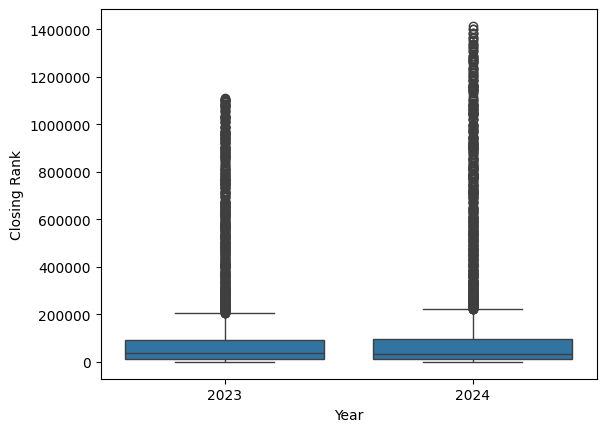

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Year", y="Closing Rank", data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

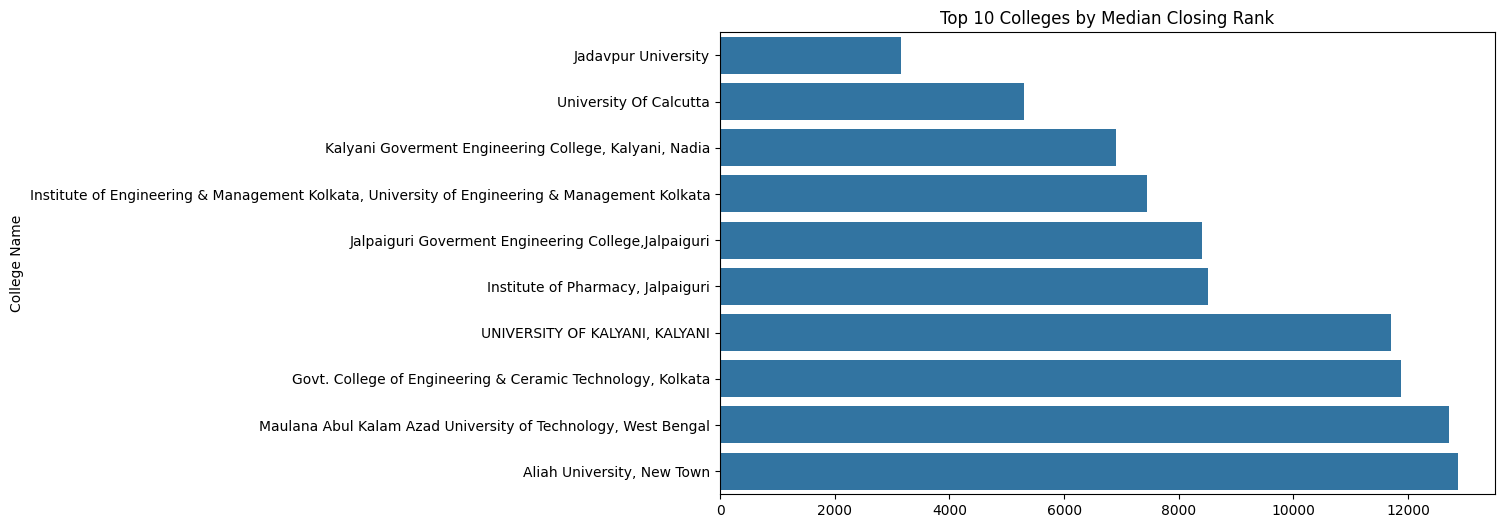

In [36]:
plt.figure(figsize=(10,6))
top_colleges = df.groupby("College Name")["Closing Rank"].median().sort_values().head(10)
sns.barplot(x=top_colleges.values, y=top_colleges.index)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Top 10 Colleges by Median Closing Rank")
plt.show()

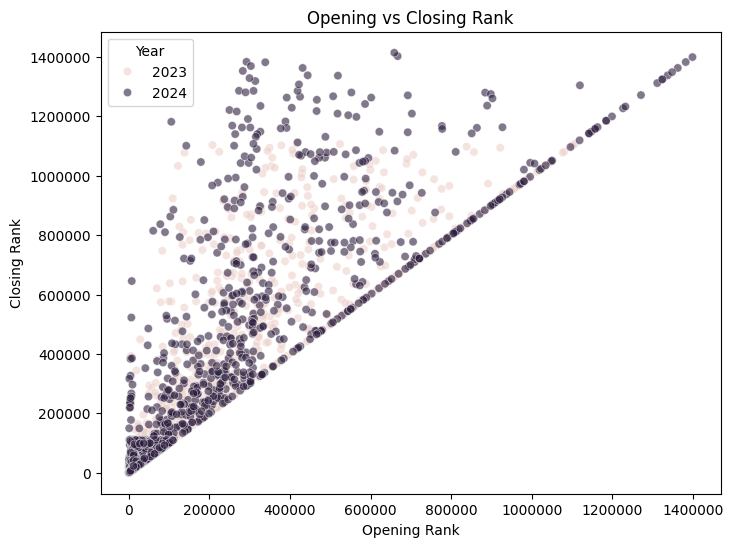

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Opening Rank", y="Closing Rank", hue="Year", data=df, alpha=0.6)
plt.ticklabel_format(style='plain', axis='both')
plt.title("Opening vs Closing Rank")
plt.show()

/tmp/ipython-input-1122264424.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Category", y="Closing Rank", data=df, scale="width", inner="quartile")


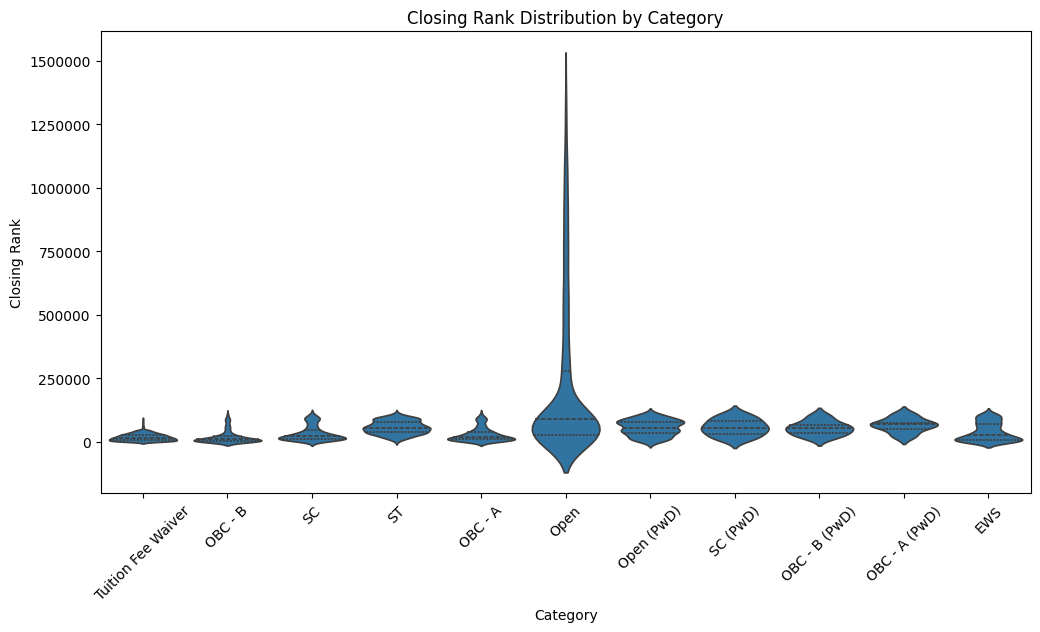

In [38]:
plt.figure(figsize=(12,6))
sns.violinplot(x="Category", y="Closing Rank", data=df, scale="width", inner="quartile")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Closing Rank Distribution by Category")
plt.xticks(rotation=45)
plt.show()

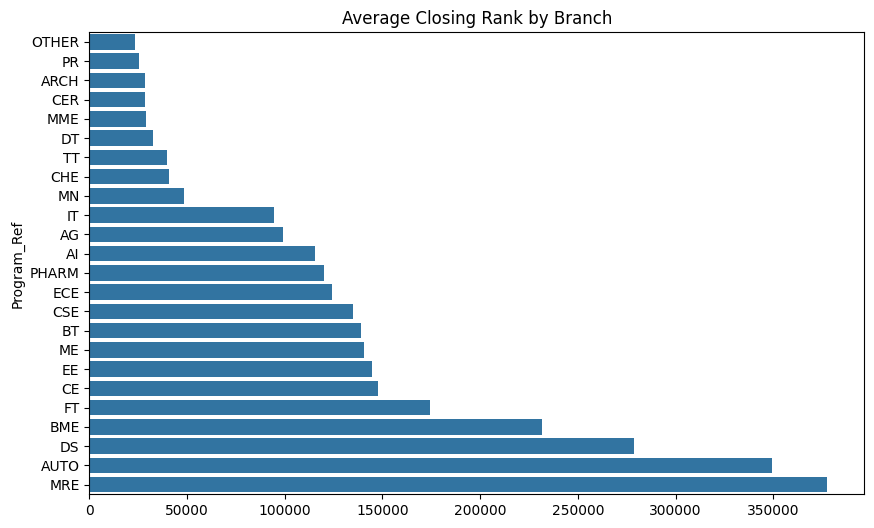

In [39]:
plt.figure(figsize=(10,6))
branch_rank = df.groupby("Program_Ref")["Closing Rank"].mean().sort_values()
sns.barplot(x=branch_rank.values, y=branch_rank.index)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Average Closing Rank by Branch")
plt.show()

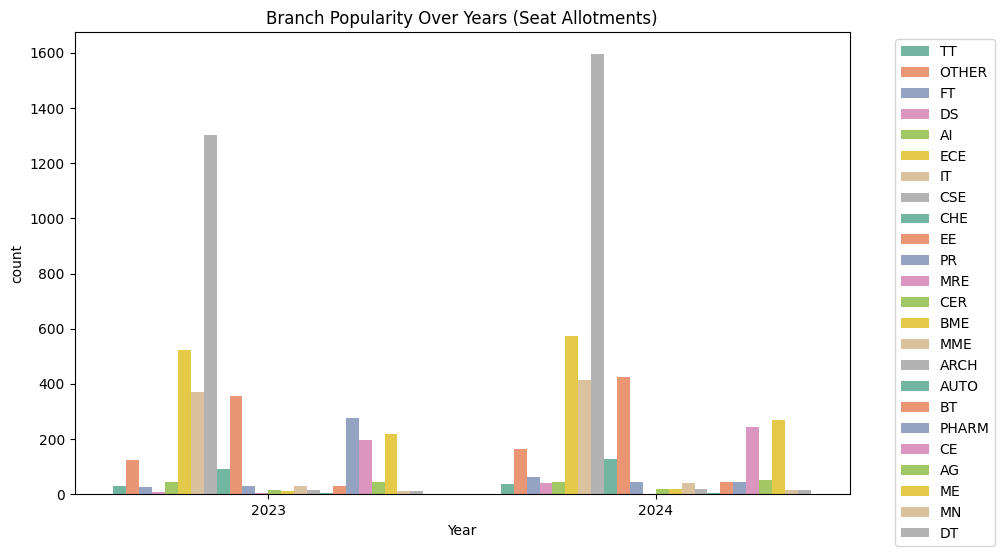

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x="Year", hue="Program_Ref", data=df, palette="Set2")
plt.title("Branch Popularity Over Years (Seat Allotments)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

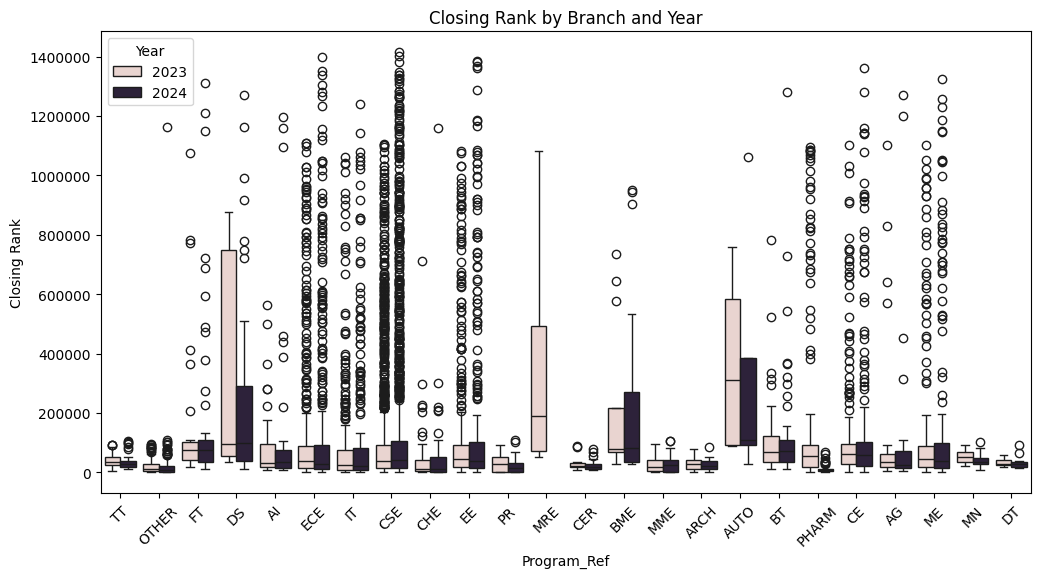

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Program_Ref", y="Closing Rank", hue="Year", data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Closing Rank by Branch and Year")
plt.xticks(rotation=45)
plt.show()

# **LET'S DETECT OUTLIERS **

In [42]:
import numpy as np

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

outliers_open, low_open, up_open = detect_outliers(df, "Opening Rank")
outliers_close, low_close, up_close = detect_outliers(df, "Closing Rank")

print("Opening Rank outliers:", len(outliers_open))
print("Closing Rank outliers:", len(outliers_close))

Opening Rank outliers: 1024
Closing Rank outliers: 1089


In [43]:
df.sample(5)

,Round,College Name,Seat Type,Quota,Category,Opening Rank,Closing Rank,Year,Program_Ref
1092,1,"Heritage Institute of Technology, Kolkata",WBJEE Seats,Home State,ST,22660,22660,2023,CSE
6064,2,"Budge Budge Institute of Technology, Budge-Budge",WBJEE Seats,Home State,Tuition Fee Waiver,41552,41552,2024,CSE
3617,3,"Ideal Institute of Engineering, Kalyani",JEE(Main) Seats,All India,Open,1077402,1077402,2023,CSE
2752,2,"Institute of Engineering & Management Kolkata,...",WBJEE Seats,Home State,Tuition Fee Waiver,4936,4936,2023,CSE
3897,1,"Narula Institute of Technology, Agarpara, Kolkata",WBJEE Seats,All India,Open,1748,46216,2024,ECE
